# Christian Argueta and Brady Dunne
# Dr. Murray
# Faraday Lab

# Reading in the data and importing the necessary libraries

In [156]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
from scipy.stats import chi2

In [157]:
df = pd.read_csv('Lab4 Data For Python - Sheet1.csv')

In [158]:
#Assigning variables to the data

angle1 = df['Angle1']
angle2 = df['Angle2']
angle3 = df['Angle3']
angle4 = df['Angle4']
angle5 = df['Angle5']
angle6 = df['Angle6']
angle7 = df['Angle7']
angle8 = df['Angle8']
angle9 = df['Angle9']
angle10 = df['Angle10']
angle11 = df['Angle11']
angle12 = df['Angle12']
angle13 = df['Angle13']

Voltage1 = df['Volts (mV)1']
Voltage2 = df['Volts (mV)2']
Voltage3 = df['Volts (mV)3']
Voltage4 = df['Volts (mV)4']
Voltage5 = df['Volts (mV)5']
Voltage6 = df['Volts (mV)6']
Voltage7 = df['Volts (mV)7']
Voltage8 = df['Volts (mV)8']
Voltage9 = df['Volts (mV)9']
Voltage10 = df['Volts (mV)10']
Voltage11 = df['Volts (mV)11']
Voltage12 = df['Volts (mV)12']
Voltage13 = df['Volts (mV)13']

#Creating a list of the angles and voltages

angles = [angle1, angle2, angle3, angle4, angle5, angle6, angle7, angle8, angle9, angle10, angle11, angle12, angle13]
voltages = [Voltage1, Voltage2, Voltage3, Voltage4, Voltage5, Voltage6, Voltage7, Voltage8, Voltage9, Voltage10, Voltage11, Voltage12, Voltage13]

# Let's first plot the polycarbonate data

# Input: 3.01V and 1.12 Amps + Reversed

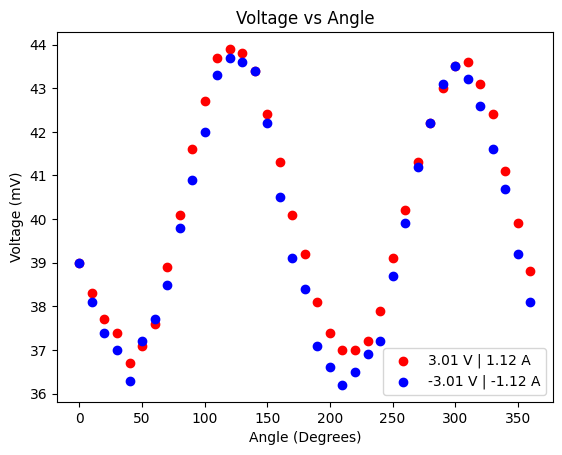

In [159]:
#Plotting the data
plt.scatter(angle1, Voltage1 , color = 'red', label = '3.01 V | 1.12 A')
plt.scatter(angle2, Voltage2 , color = 'blue', label = '-3.01 V | -1.12 A')

plt.xlabel('Angle (Degrees)')
plt.ylabel('Voltage (mV)')
plt.title('Voltage vs Angle')
plt.legend()
plt.show()

# Input: 0 v and 0.00 Amps

Text(0.5, 1.0, 'Voltage vs Angle')

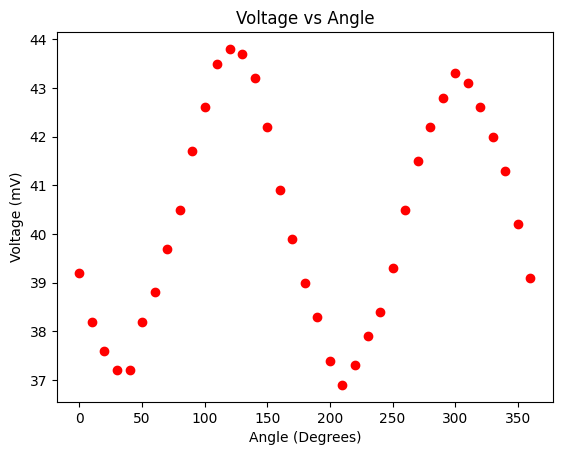

In [160]:
plt.scatter(angle3, Voltage3 , color = 'red', label = '0 mV | 0 A')
plt.xlabel('Angle (Degrees)')
plt.ylabel('Voltage (mV)')
plt.title('Voltage vs Angle')

# Input 5.23 V 1.99 Amps + Reversed

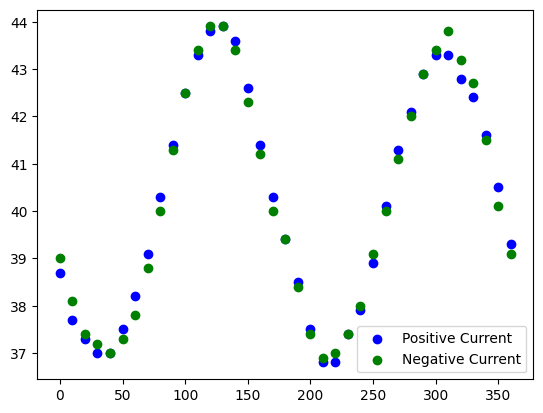

In [161]:
plt.scatter(angle4, Voltage4 , color = 'blue', label = 'Positive Current')
plt.scatter(angle5, Voltage5 , color = 'green', label = 'Negative Current')

plt.legend()
plt.show()

# So you get the idea. Now I'll plot all of them 

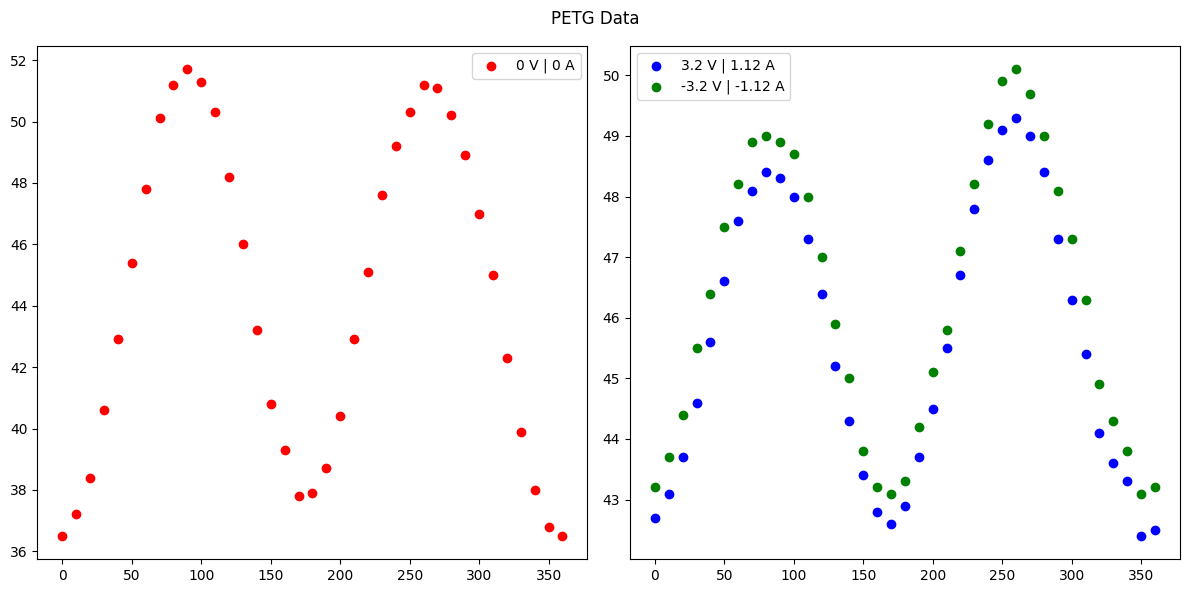

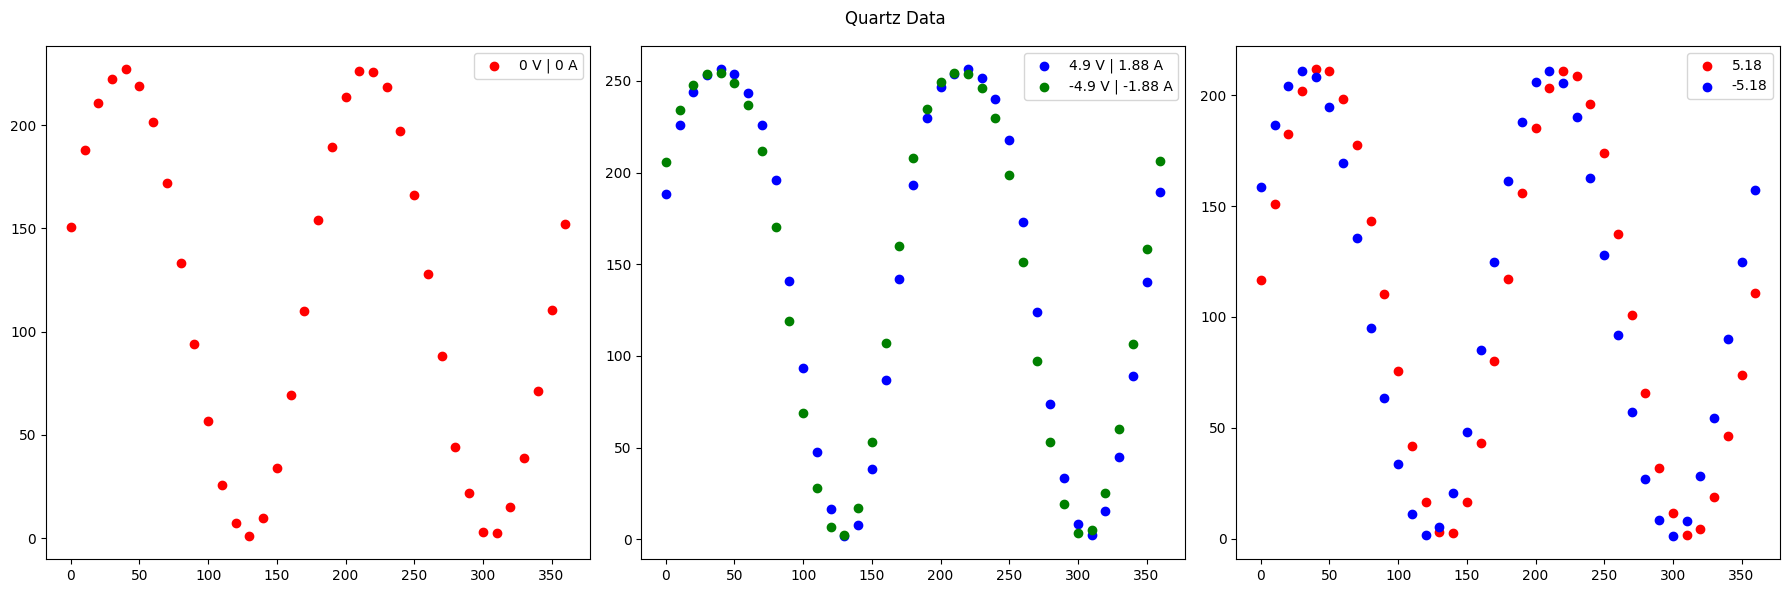

In [162]:
#plot the rest of the data on a 1 x 2 grid
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Increase the figsize parameter to make the plots larger
fig.suptitle('PETG Data')
axs[0].scatter(angle6, Voltage6 , color = 'red', label = '0 V | 0 A')
axs[0].legend()

axs[1].scatter(angle7, Voltage7 , color = 'blue', label = '3.2 V | 1.12 A')
axs[1].scatter(angle8, Voltage8 , color = 'green', label = '-3.2 V | -1.12 A')
axs[1].legend()

plt.tight_layout()
plt.show()

#Plot the other ones on a 1 x 3 grid
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Increase the figsize parameter to make the plots larger
fig.suptitle('Quartz Data')
axs[0].scatter(angle9, Voltage9 , color = 'red', label = '0 V | 0 A')
axs[0].legend()

axs[1].scatter(angle10, Voltage10 , color = 'blue', label = '4.9 V | 1.88 A')
axs[1].scatter(angle11, Voltage11 , color = 'green', label = '-4.9 V | -1.88 A')
axs[1].legend()

axs[2].scatter(angle12, Voltage12 , color = 'red', label = '5.18')
axs[2].scatter(angle13, Voltage13 , color = 'blue', label = '-5.18')
axs[2].legend()

plt.tight_layout()
plt.show()

# Lets do the quartz fitting

In [163]:
# Normalize the voltages
Voltage12 = Voltage12 / np.max(Voltage12) if np.max(Voltage12) != 0 else Voltage12
Voltage13 = Voltage13 / np.max(Voltage13) if np.max(Voltage13) != 0 else Voltage13

#Convert the angles to radians
angle12 = np.radians(angle12)
angle13 = np.radians(angle13)


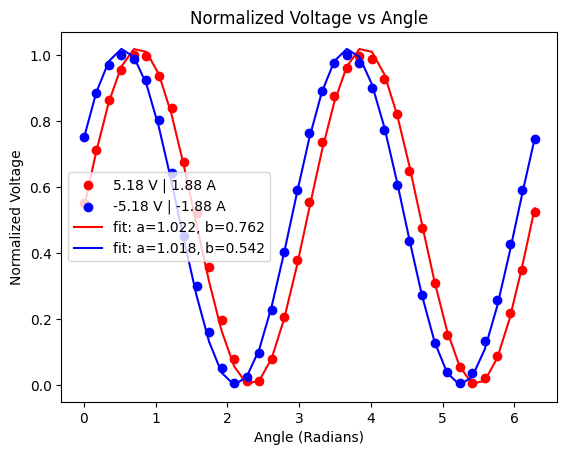

In [164]:

# Creating a function to fit the data cos^2(theta - phi)
def cos_sq(x, a, b):
    return a * (np.cos(x - b))**2

# Take in guesses for the parameters
guess = [.259, 0.2]  # Initial guesses for parameters a and b

# Fitting the data using the guesses
popt, pcov = curve_fit(cos_sq, angle12, Voltage12, p0=guess)
popt2, pcov2 = curve_fit(cos_sq, angle13, Voltage13, p0=guess)

# Plotting the data
plt.scatter(angle12, Voltage12, color='red', label='5.18 V | 1.88 A')
plt.scatter(angle13, Voltage13, color='blue', label='-5.18 V | -1.88 A')
plt.plot(angle12, cos_sq(angle12, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.plot(angle13, cos_sq(angle13, *popt2), 'b-', label='fit: a=%5.3f, b=%5.3f' % tuple(popt2))

plt.xlabel('Angle (Radians)')
plt.ylabel('Normalized Voltage')
plt.title('Normalized Voltage vs Angle')
plt.legend()
plt.show()

In [165]:
phase_diff = np.abs(popt[1] - popt2[1])
print(f'The phase difference between the two data sets is {phase_diff} radians')

The phase difference between the two data sets is 0.21950335745794547 radians
